# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("/content/credit_card_fraud_dataset.csv")
df

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0
...,...,...,...,...,...,...,...
99995,99996,2024-06-07 00:57:36.027591,1057.29,289,refund,San Antonio,0
99996,99997,2023-10-22 23:12:36.027594,297.25,745,refund,San Antonio,0
99997,99998,2024-05-31 19:27:36.027597,3448.56,690,purchase,San Antonio,0
99998,99999,2024-10-18 09:43:36.027601,3750.79,644,purchase,Philadelphia,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [4]:
print(f"Jumlah duplikasi : {df.duplicated().sum()}")
print(f"Jumlah missing value : {df.isnull().sum().sum()}")

Jumlah duplikasi : 0
Jumlah missing value : 0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


Distribusi Target (Imbalance Check)

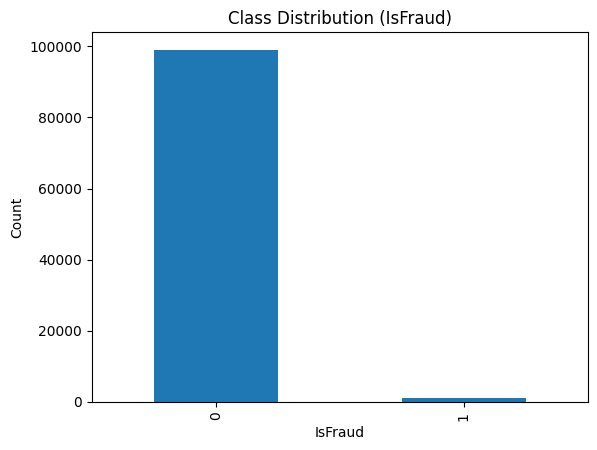

,proportion
IsFraud,
0,0.99
1,0.01


In [6]:
plt.figure()
df['IsFraud'].value_counts().plot(kind='bar')
plt.title('Class Distribution (IsFraud)')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

# Proporsi
df['IsFraud'].value_counts(normalize=True)


Distribusi Amount

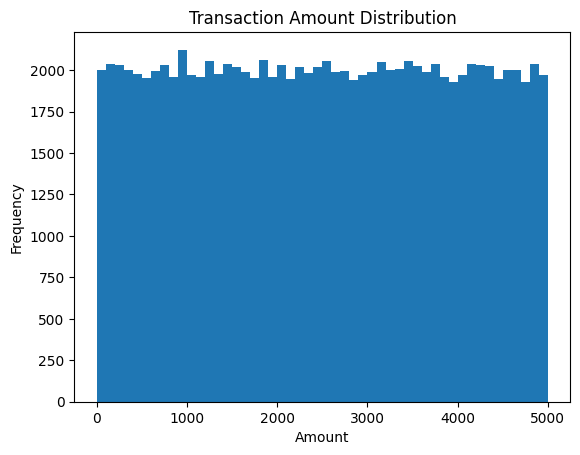

,Amount
count,100000.000000
mean,2497.092666
std,1442.415999
min,1.050000
25%,1247.955000
50%,2496.500000
75%,3743.592500
max,4999.770000


In [7]:
plt.figure()
plt.hist(df['Amount'], bins=50)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

df['Amount'].describe()


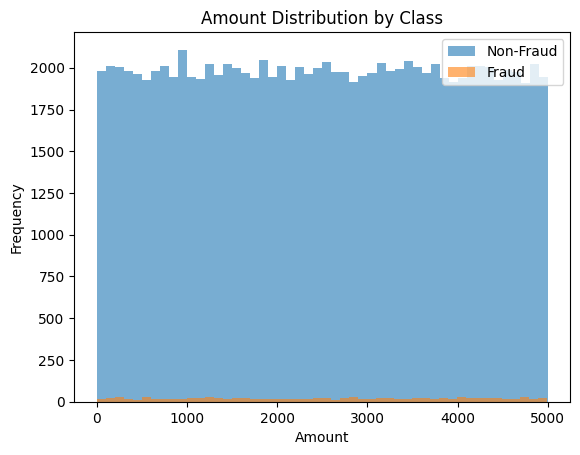

In [8]:
plt.figure()
plt.hist(df[df['IsFraud']==0]['Amount'], bins=50, alpha=0.6, label='Non-Fraud')
plt.hist(df[df['IsFraud']==1]['Amount'], bins=50, alpha=0.6, label='Fraud')
plt.legend()
plt.title('Amount Distribution by Class')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


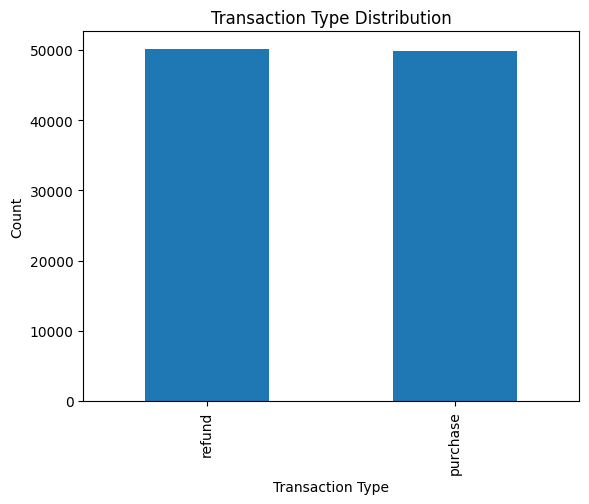

In [9]:
plt.figure()
df['TransactionType'].value_counts().plot(kind='bar')
plt.title('Transaction Type Distribution')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()


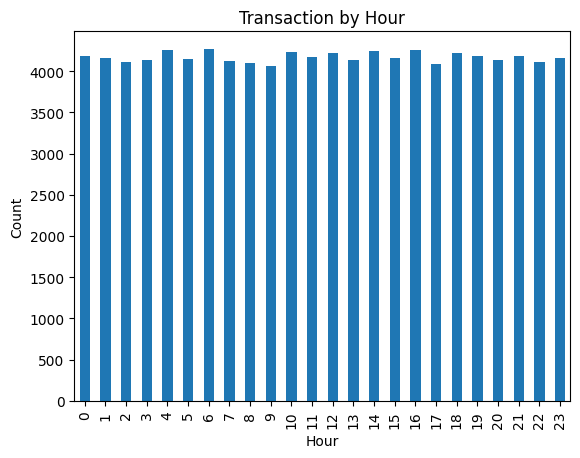

In [10]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['hour'] = df['TransactionDate'].dt.hour

plt.figure()
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Transaction by Hour')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
df.isna().sum()

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0
hour,0


In [ ]:
# Jika ada missing value (general case)
# df = df.dropna()

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df_encoded = pd.get_dummies(
    df,
    columns=["TransactionType", "Location"],
    drop_first=True
)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded["Amount_scaled"] = scaler.fit_transform(
    df_encoded[["Amount"]]
)

In [15]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [16]:
df = df[(df["Amount"] >= lower_bound) & (df["Amount"] <= upper_bound)]


In [17]:
df["Amount_bin"] = pd.qcut(
    df["Amount"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)


In [18]:
#drop kolom tidak relevan
df = df.drop(columns=["TransactionID"])

In [19]:
df.to_csv("credit_card_fraud_preprocessed.csv", index=False)
